### Titanic의 PCA

In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


In [3]:
titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
title = []
for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [5]:
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Dr', 'Lady', 'the Countess']

Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [6]:
le_sex = LabelEncoder()
le_sex.fit(titanic['sex'])
titanic['gender'] = le_sex.transform(titanic['sex'])
le_sex.classes_

array(['female', 'male'], dtype=object)

In [7]:
le_grade = LabelEncoder()
le_grade.fit(titanic['title'])
titanic['grade'] = le_grade.transform(titanic['title'])

le_grade.classes_

array(['Miss', 'Mr', 'Mrs', 'Rare_f', 'Rare_m'], dtype=object)

In [8]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,gender,grade
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Rare_m,1,4
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,1,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,0,2


In [9]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  title      1045 non-null   object 
 15  gender     1045 non-null   int64  
 16  grade      1045 non-null   int64  
dtypes: float64(3), int64(6), object(8)
memory usage: 147.0+ KB


In [10]:
x = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender', 'grade']].astype('float')
y = titanic['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [11]:
def get_pca_data(ss_data, n_components=2) :
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [12]:
def get_pd_from_pca(pca_data, col_num) :
    cols = ['pca_'+str(n) for n in range(col_num)]
    return pd.DataFrame(pca_data, columns=cols)

In [13]:
def print_variance_ratio(pca, only_sum=False) :
    if only_sum == False :
        print('variance_ratio : ', pca.explained_variance_ratio_)
    print('sum of variance_ratio : ', np.sum(pca.explained_variance_ratio_))

In [14]:
pca_data, pca = get_pca_data(x_train, n_components=2)
print_variance_ratio(pca)

variance_ratio :  [0.94203952 0.05709626]
sum of variance_ratio :  0.999135777395935


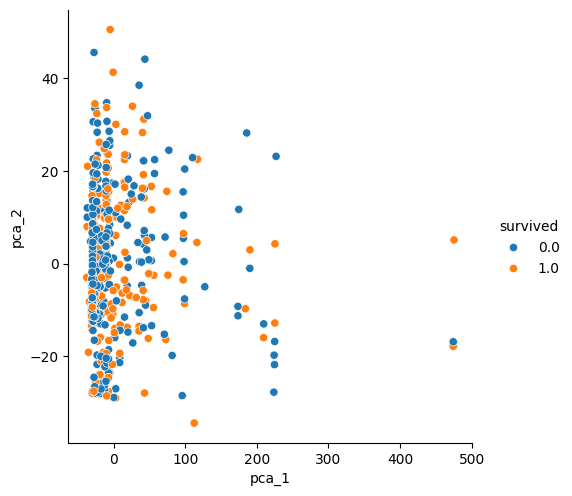

In [15]:
pca_columns = ['pca_1', 'pca_2']
pca_pd = pd.DataFrame(pca_data, columns=pca_columns)
pca_pd['survived'] = y_train
sns.pairplot(pca_pd, hue='survived', height=5, x_vars=['pca_1'], y_vars=['pca_2'])

In [16]:
pca_data, pca = get_pca_data(x_train, n_components=3)
print_variance_ratio(pca)

variance_ratio :  [9.42039516e-01 5.70962618e-02 3.52048121e-04]
sum of variance_ratio :  0.9994878255165592


In [17]:
pca_pd = get_pd_from_pca(pca_data, 3)
pca_pd['survived'] = y_train.values
pca_pd.head()

,pca_0,pca_1,pca_2,survived
0,-28.675760,13.583872,0.129223,0
1,18.665837,-13.706762,0.416703,1
2,-28.844757,-12.415400,-0.661119,0
3,-29.913627,-1.355022,-0.503757,0
4,-30.438144,1.672771,-0.460249,0


In [18]:
fig = px.scatter_3d(pca_pd, x='pca_0', y='pca_1', z='pca_2', color='survived', symbol='survived', opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [19]:
estimators = [('scaler', StandardScaler()), ('pca', PCA(n_components=3)), ('clf', KNeighborsClassifier(n_neighbors=20))]
pipe = Pipeline(estimators)
pipe.fit(x_train, y_train)
pred = pipe.predict(x_test)
print(accuracy_score(y_test, pred))

0.7559808612440191


In [20]:
dicaprio = np.array([[3, 18, 0, 0, 5, 1, 1]])
print('Decaprio : ', pipe.predict_proba(dicaprio)[0,1])
winslet = np.array([[1, 16, 1, 1, 100, 0, 3]])
print('Winslet : ', pipe.predict_proba(winslet)[0,1])

Decaprio :  0.1
Winslet :  0.85


/home/han/venv/myvenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/home/han/venv/myvenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

